In [1]:
from collections import Counter
import pprint
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
f = open(f"./test_processed.txt", "r")
test_word_tag_pairs = f.readlines()
f.close()
print(len(test_word_tag_pairs))
test_word_tag_pairs[4]

3629682


'country_NN1\n'

In [3]:
test_word_tag_pairs = [word_tag_pair[:-1] for word_tag_pair in test_word_tag_pairs]
word_tag_pairs = Counter(test_word_tag_pairs).most_common()
word_tag_pairs = [word_tag_pair[0] for word_tag_pair in word_tag_pairs]

In [4]:
print(word_tag_pairs[4])

in_PRP


In [5]:
# Reference index dictionaries for conversion between tag and its index

tag_freq = Counter([pair.split('_')[1] for pair in word_tag_pairs]).most_common()

tags_to_index = {}
for index in range(len(tag_freq)):
    tags_to_index[tag_freq[index][0]] = index
#print(tags_to_index)

index_to_tags = {}
for index in range(len(tag_freq)):
    index_to_tags[index] = tag_freq[index][0]
print(index_to_tags)

{0: 'NN1', 1: 'AJ0', 2: 'NP0', 3: 'NN2', 4: 'NP0-NN1', 5: 'CRD', 6: 'VVG', 7: 'VVN', 8: 'VVI', 9: 'VVD', 10: 'AJ0-NN1', 11: 'AV0', 12: 'VVB', 13: 'NN1-VVB', 14: 'NN1-AJ0', 15: 'NN1-NP0', 16: 'UNC', 17: 'VVB-NN1', 18: 'VVZ', 19: 'NN0', 20: 'VVN-VVD', 21: 'VVD-VVN', 22: 'VVG-AJ0', 23: 'NN2-VVZ', 24: 'VVN-AJ0', 25: 'VVG-NN1', 26: 'NN1-VVG', 27: 'AJ0-VVN', 28: 'VVZ-NN2', 29: 'AJ0-VVG', 30: 'AJ0-VVD', 31: 'VVD-AJ0', 32: 'AJC', 33: 'PRP', 34: 'AJS', 35: 'AJ0-AV0', 36: 'ITJ', 37: 'ORD', 38: 'AV0-AJ0', 39: 'DT0', 40: 'CJS', 41: 'PNP', 42: 'ZZ0', 43: 'PNI', 44: 'VM0', 45: 'AVP', 46: 'PRP-AVP', 47: 'DPS', 48: 'AVQ', 49: 'AVP-PRP', 50: 'PNX', 51: 'AT0', 52: 'CJC', 53: 'DTQ', 54: 'CJS-PRP', 55: 'PRP-CJS', 56: 'VBB', 57: 'PNQ', 58: 'VBD', 59: 'XX0', 60: 'VDB', 61: 'VDZ', 62: 'VHB', 63: 'VHZ', 64: 'VBG', 65: 'CJS-AVQ', 66: 'TO0', 67: 'VBZ', 68: 'VHI', 69: 'PRF', 70: 'VBI', 71: 'VHD', 72: 'EX0', 73: 'VHG', 74: 'VDG', 75: 'PNI-CRD', 76: 'AVQ-CJS', 77: 'CJT', 78: 'POS', 79: 'VBN', 80: 'VDD', 81: 'CJT-D

In [6]:
# preparing test data

samples_as_they_come = True # use test samples as they come during testing (can be repeated)

if samples_as_they_come:
    test_words = [word_tag_pair.split('_')[0] for word_tag_pair in test_word_tag_pairs]
    print(len(test_words))
    gt_tags = [tags_to_index[word_tag_pair.split('_')[1]] for word_tag_pair in test_word_tag_pairs]
else:
    test_words = [word_tag_pair.split('_')[0] for word_tag_pair in word_tag_pairs]
    print(len(test_words))
    gt_tags = [tags_to_index[word_tag_pair.split('_')[1]] for word_tag_pair in word_tag_pairs]

test_words[20]

3629682


'to'

In [7]:
# load the model

word_tag_probs = np.load("model.npy").item()
print(len(word_tag_probs))

192526


In [8]:
# run prediction on whole test data

pred_tags = []
count_nf = 0
for index in range(len(test_words)):
    #print(word)
    word = test_words[index]
    #print(f"word = {word}, gt_tag = {index_to_tags[gt_tags[index]]}")
    if word in word_tag_probs:
        #print(f"prediction = {word_tag_probs.get(word)}")
        predicted_tag = word_tag_probs[word][0][0].split('_')[1]
    else:
        predicted_tag = 'UNC'
        # print(f"{word} not found")
        count_nf += 1
    pred_tags.append(tags_to_index[predicted_tag])
print(count_nf)

65063


In [9]:
# accuracy calculation

count_cp = 0
for index in range(len(test_words)):
    if gt_tags[index] == pred_tags[index]:
        # correct prediction
        count_cp += 1

accuracy = count_cp/len(test_words)
print(f"Accuracy = {accuracy*100}")

Accuracy = 87.40570110549629


In [10]:
# confusion matrix creation

cm = confusion_matrix(gt_tags, pred_tags)
np.savetxt("confusion_matrix.txt", cm, fmt="%d", delimiter="\t")
print(cm)
print(cm[20,20])

[[501186   5436   2459 ...      0      0      0]
 [  2878 221870    995 ...      0      0      0]
 [  2236    946 104661 ...      0      0      0]
 ...
 [     0      0      0 ...   1000      0      0]
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]]
163


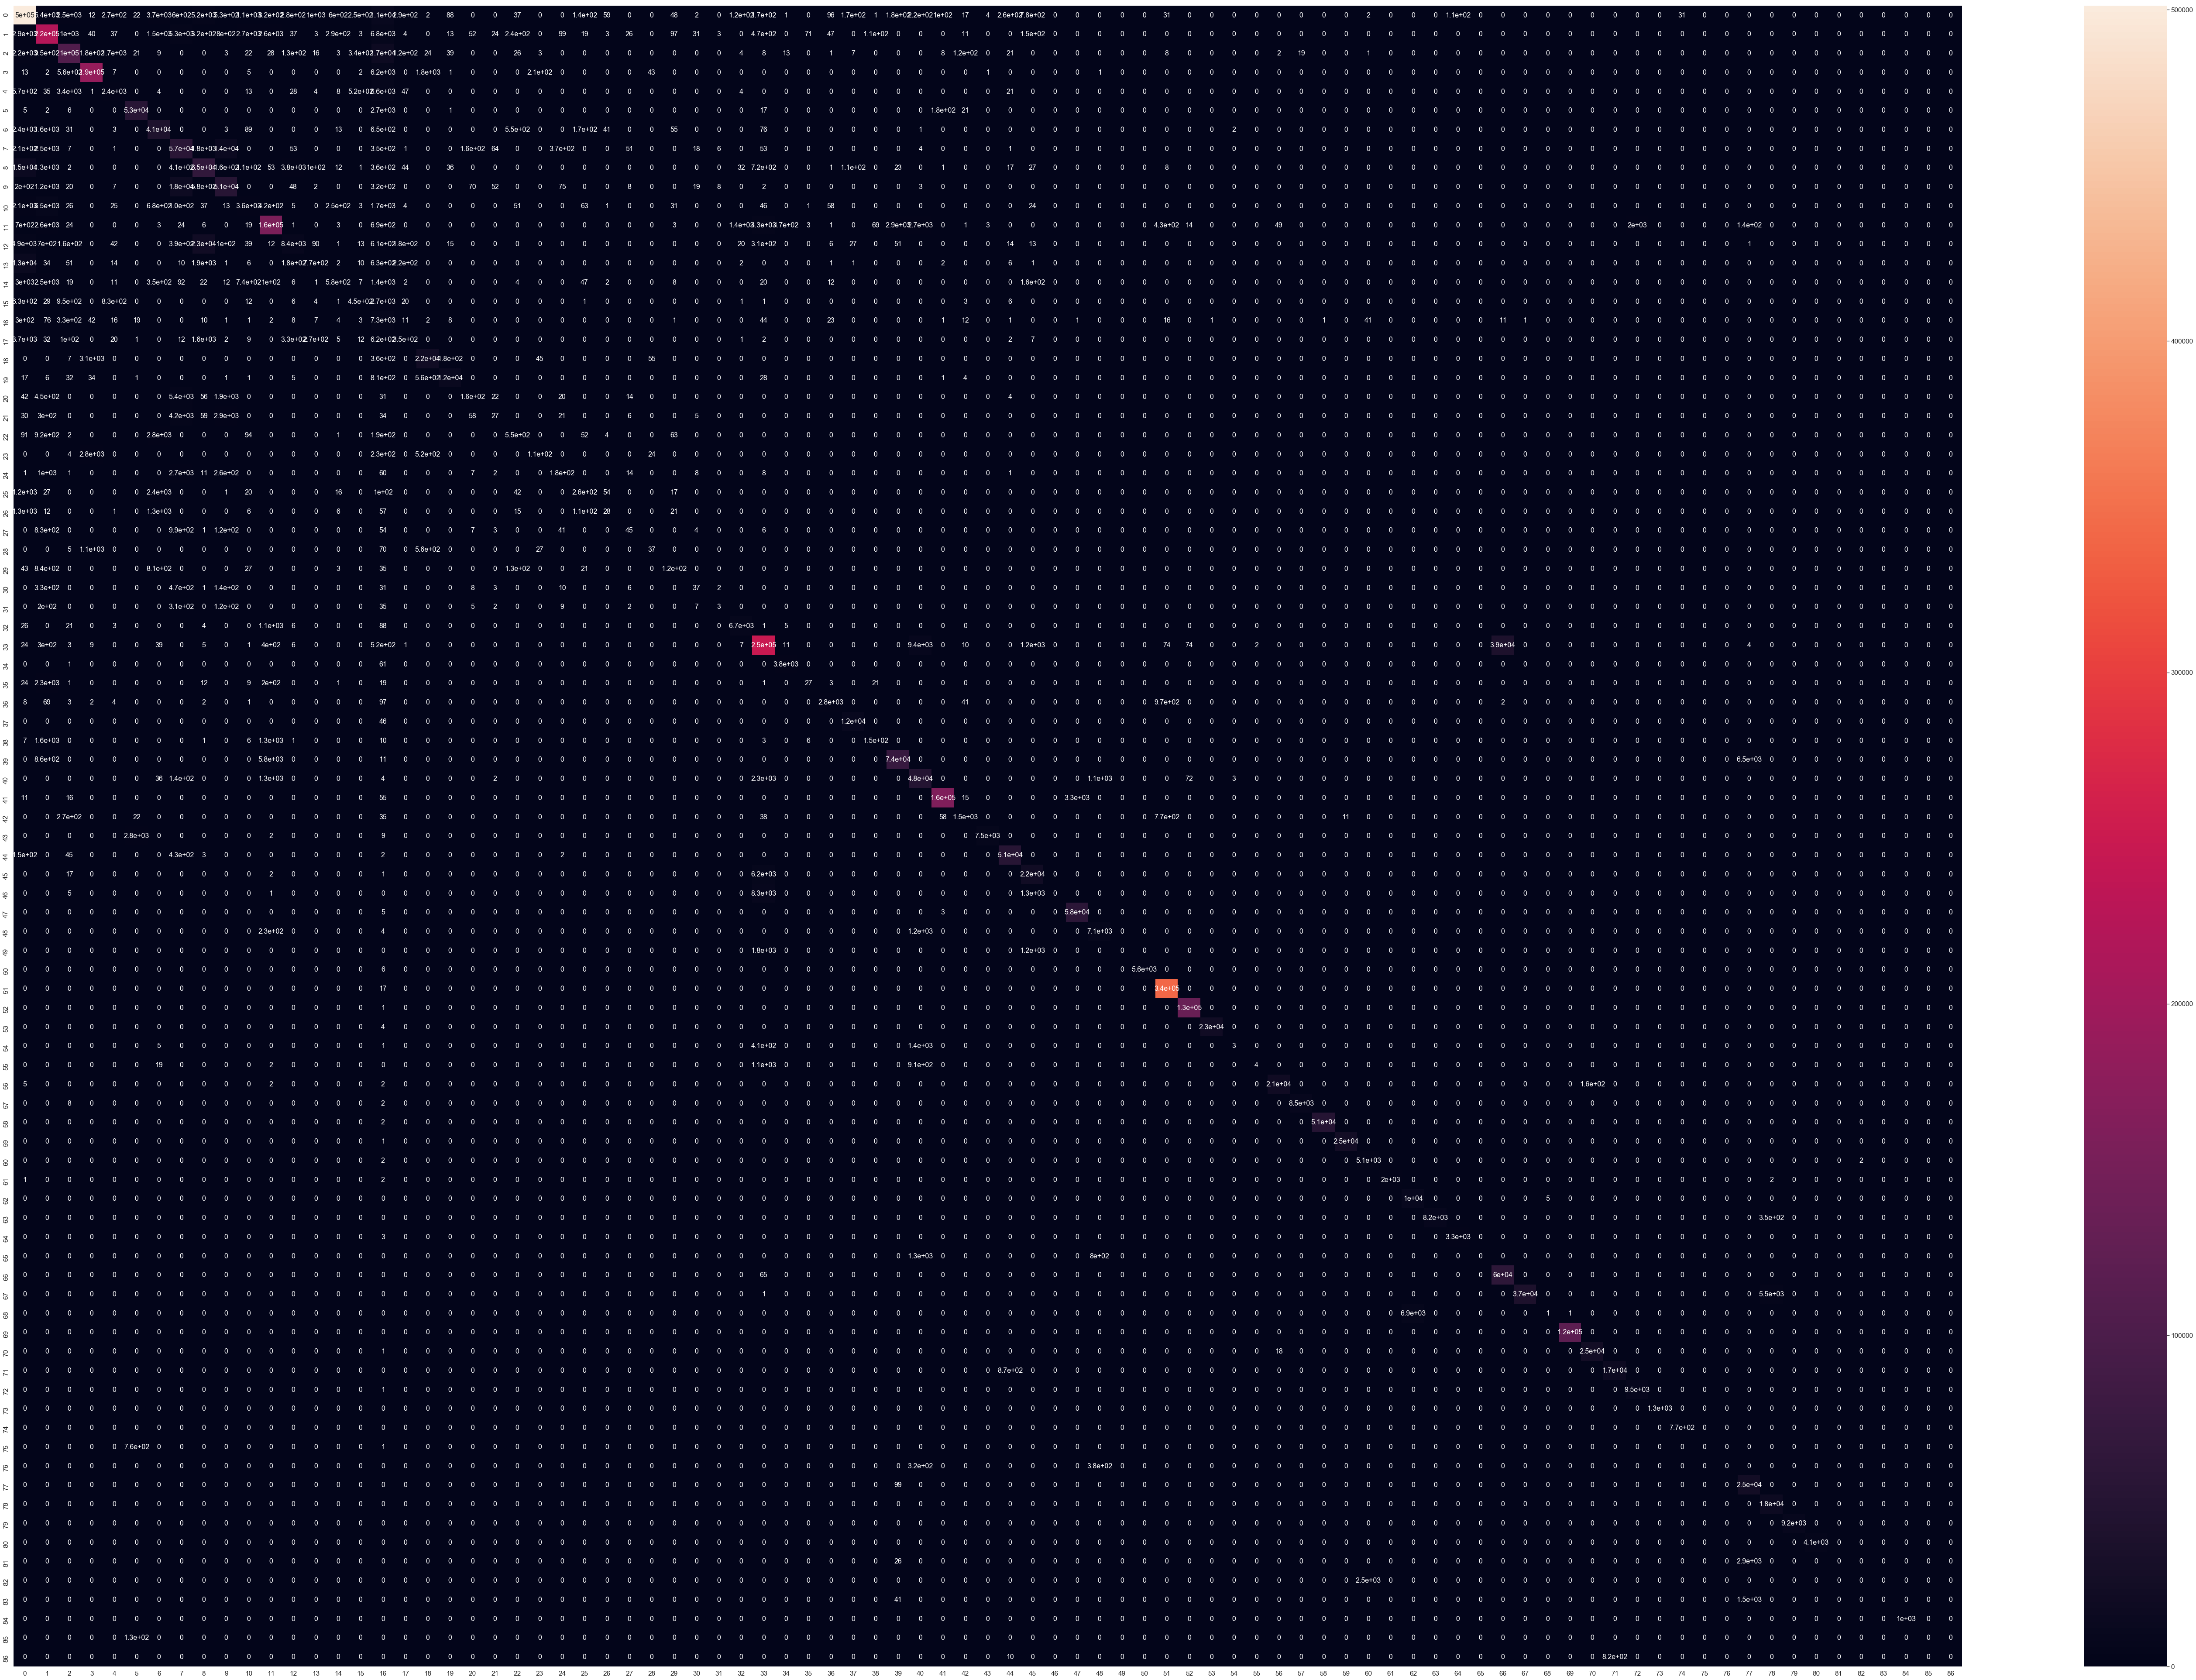

In [11]:
# Plotting the confusion matrix
plt.figure(figsize = (100,70))
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size